In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns = ['class label','Alcohol','Malic Acid']

In [9]:
df.sample(5)

,class label,Alcohol,Malic Acid
53,1,13.77,1.90
154,3,12.58,1.29
146,3,13.88,5.04
58,1,13.72,1.43
77,2,11.84,2.89


C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Alcohol', ylabel='Density'>

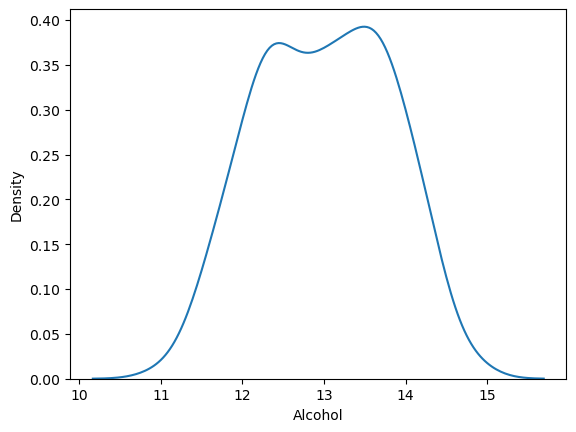

In [29]:
sns.kdeplot(df['Alcohol'])

C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Malic Acid', ylabel='Density'>

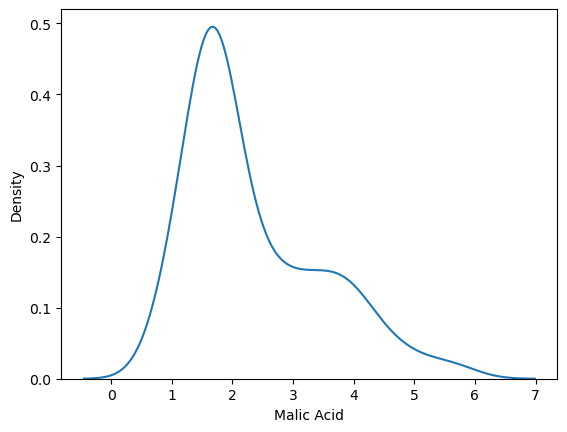

In [31]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

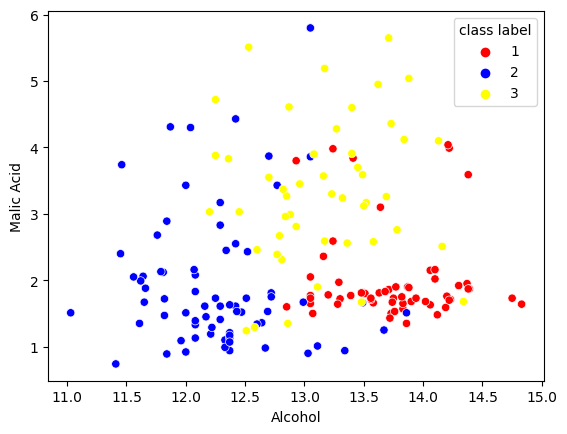

In [49]:
color_dict = {1:'red',3:'yellow',2:'blue'}
sns.scatterplot(x = df['Alcohol'],y = df['Malic Acid'],hue = df['class label'],palette=color_dict)

C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Before Normalization'}, xlabel='Alcohol', ylabel='Density'>

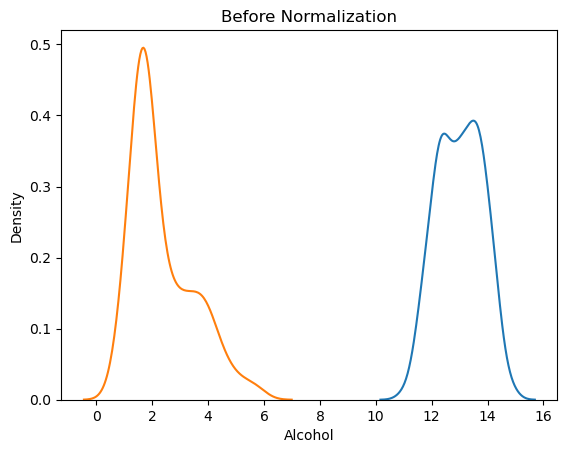

In [101]:
fig,ax1 = plt.subplots()
ax1.set_title('Before Normalization')
sns.kdeplot(df['Alcohol'],ax=ax1)
sns.kdeplot(df['Malic Acid'],ax=ax1)

In [105]:
# splitting the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('class label',axis=1),df['class label'],test_size = 0.3,random_state = 0)
x_train.shape,x_test.shape


((124, 2), (54, 2))

In [109]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [113]:
x_train_scaled = pd.DataFrame(x_train_scaled ,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [117]:
x_train_scaled

,Alcohol,Malic Acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [121]:
np.round(x_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [123]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


<Axes: title={'center': 'After Normalization'}, xlabel='Alcohol', ylabel='Malic Acid'>

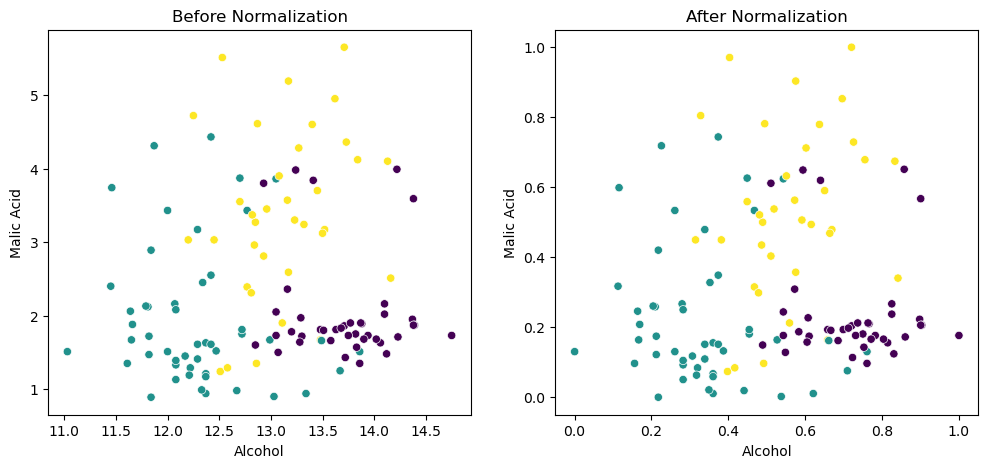

In [137]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
color_dict = {1:'red',2:'yellow',3:'blue'}
#Before normalization
ax1.set_title('Before Normalization')
sns.scatterplot(x = x_train['Alcohol'],y = x_train['Malic Acid'],c=y_train,ax = ax1)

# After Normalization
ax2.set_title('After Normalization')
sns.scatterplot(x = x_train_scaled['Alcohol'],y = x_train_scaled['Malic Acid'],c=y_train,ax = ax2)

C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='Alcohol', ylabel='Density'>

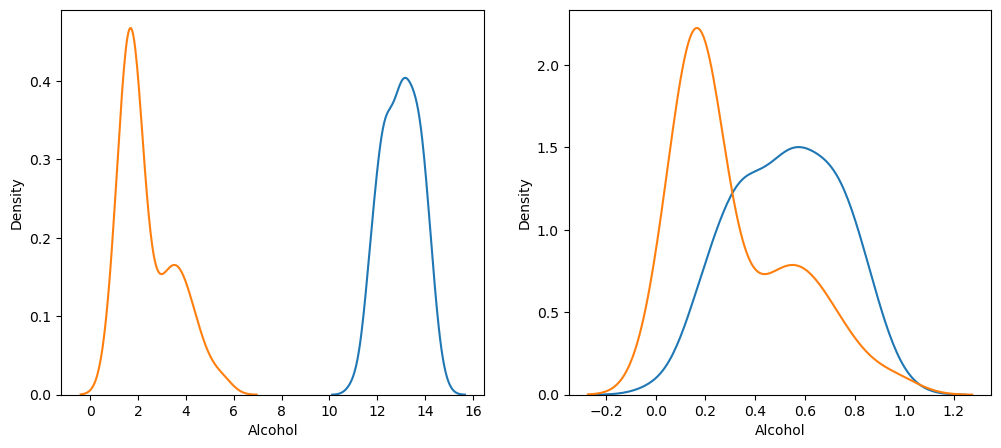

In [149]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
# before scaling
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic Acid'],ax=ax1)

# After scaling
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic Acid'],ax=ax2)
